# Heart Disease
___

## Description

### Context

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

### Content

#### Attribute Information:

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

### Acknowledgements
#### Creators:

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
- Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

### Adapted From

https://www.kaggle.com/ronitf/heart-disease-uci
___

## Goals

Train at least 5 different ML models to identify whether a patient has Heart Disease
___

## Data Dictionary

[From Imram Faroouq's Discussion Post in Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/discussion/273496)



- age - age in years
- sex - (1 = male; 0 = female)
- cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    - anything above 130-140 is typically cause for concern
- chol - serum cholestoral in mg/dl
- serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
- restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality 
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise
        - unhealthy heart will stress more
- slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
- ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
- thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
- target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

# Data Analysis

## Data Import

In [2]:
rawData = pd.read_csv("heart.csv");

## Data Review and Summaries

In [3]:
rawData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(rawData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


It can be seen that all the data is numerical, complete, and valid. This can be verified from the sources mentioned above. Thus, **No encoding or imputing is necessary**.

## General Sample Statistics
The following table describes the center and spread of each data column.

In [5]:
rawData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Plotting the Raw Data
We can further analyze the data by plotting histograms for each dataset feature.

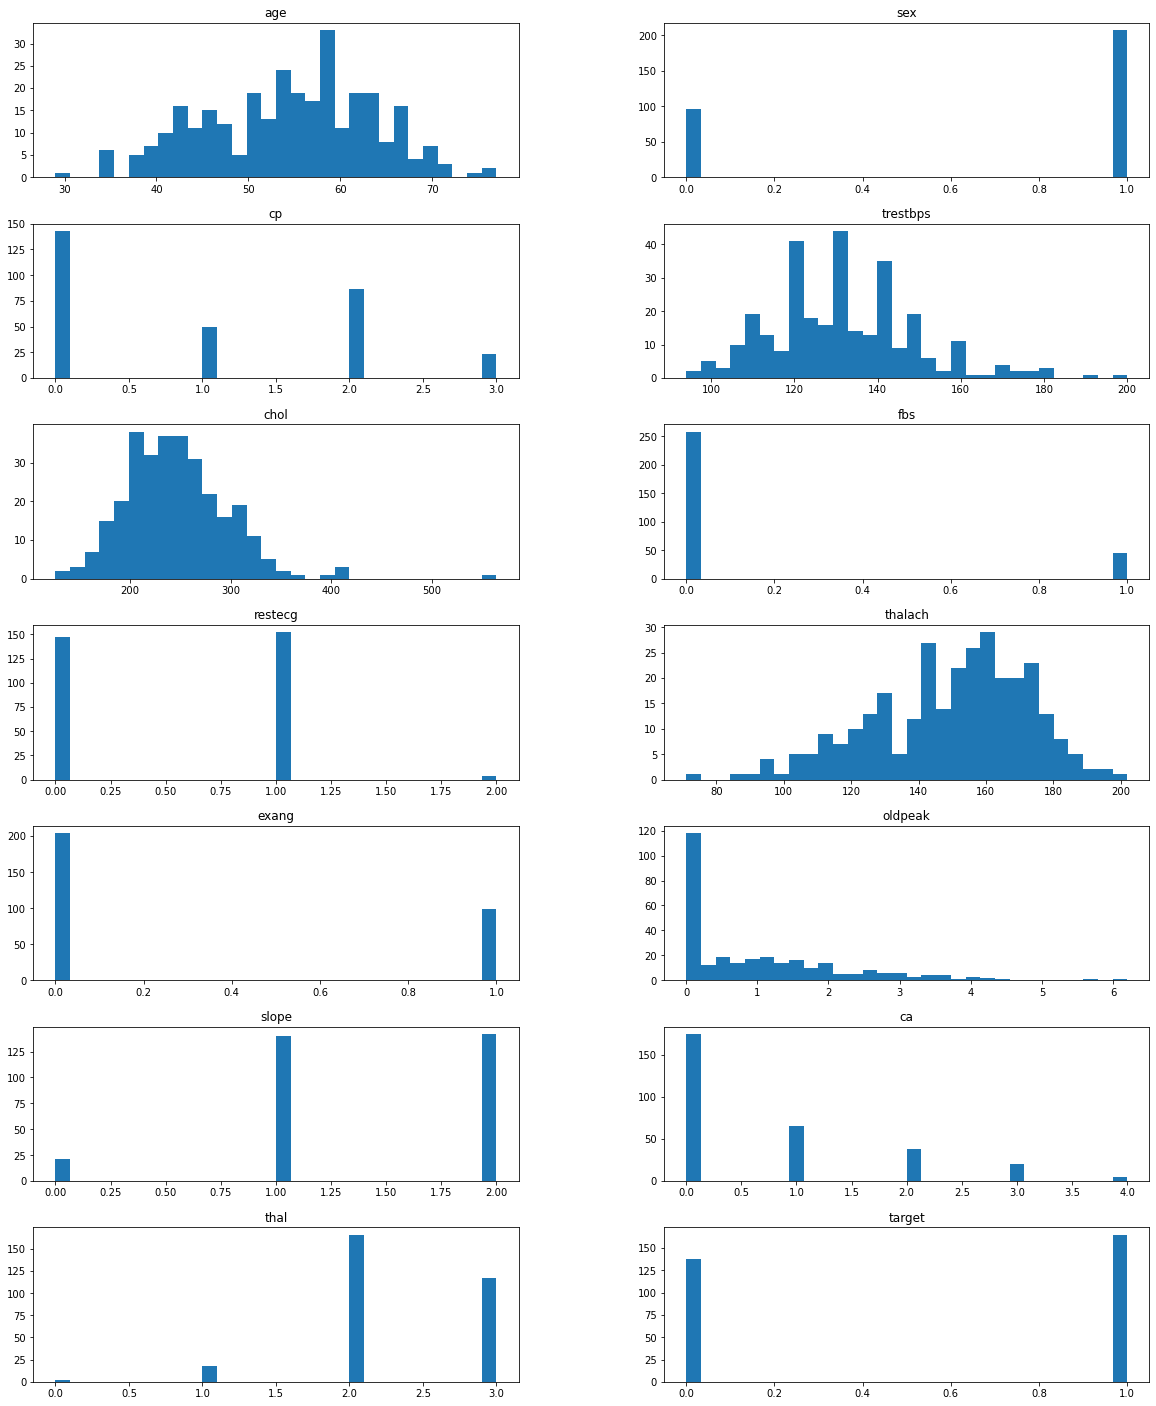

In [6]:
rawData.hist(bins=30, figsize=(20,25), grid=False, layout=(7,2), sharex=False);

## General Correlations

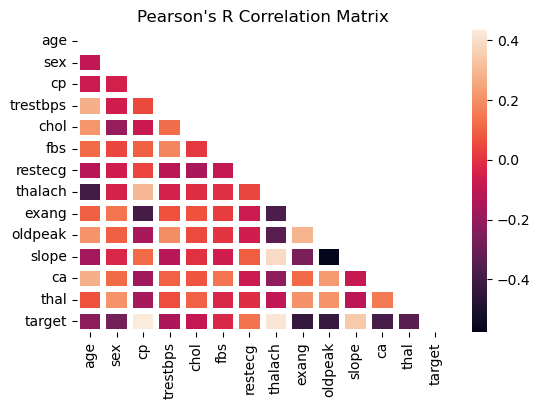

In [7]:
corr_mat = rawData.corr(method='pearson')
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.figure(dpi=100)
plt.title("Pearson's R Correlation Matrix")
sns.heatmap(corr_mat, mask=mask, annot=False, lw=3, linecolor='white', cmap='rocket');

# Data preprocessing
First we scale all the data, since it was seen above that the center, spread, and range of each feature vary wildly.

## Input/Output Splitting

In [8]:
x = rawData.iloc[:,:-1].values
y = rawData.iloc[:, -1].values

## Input Data Scaling
Since this is a classification problem, output data is binary (discrete) and must not be scaled.

In [9]:
from sklearn.preprocessing import StandardScaler
ssIN = StandardScaler()
scaledx = ssIN.fit_transform(x)
pd.DataFrame(scaledx)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


## Train and Test Split 

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaledx, y, test_size = 0.2);
#pd.DataFrame(x_test)
#pd.DataFrame(x_train)

# Model Training
We train the following models:
- Linear SVC
- Kernel SVC
    - RBF
    - Polynomial
- KNN
- Naive Bayes
- Random Forest
- Logistic Regression
- Discriminant Analysis

In [11]:
models = [];

## SVC

In [12]:
from sklearn.svm import SVC
linSVCmodel = SVC() #C Param can be optimized
linSVCmodel.fit(x_train,y_train);
models.append(linSVCmodel);

## Kernel SVC: Radial Basis Function

In [13]:
from sklearn.svm import SVC
rbfSVCmodel = SVC(kernel='rbf'); #C can be optimized
rbfSVCmodel.fit(x_train,y_train);
models.append(rbfSVCmodel);

## Kernel SVC: Polynomial

In [14]:
from sklearn.svm import SVC
polySVCmodel = SVC(kernel='poly', degree=3); #Degree can be optimized
polySVCmodel.fit(x_train,y_train);
models.append(polySVCmodel);

## KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier(n_neighbors=5, p=2); #K can be optimized
KNNmodel.fit(x_train, y_train);
models.append(KNNmodel);

## Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
gaussNBmodel = GaussianNB(); #Epsilon can be optimized?
gaussNBmodel.fit(x_train, y_train);
models.append(gaussNBmodel);

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=100); #N_estimators and criterion can be optimized.
RFCmodel.fit(x_train, y_train);
models.append(RFCmodel);

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(); #DNC
LRmodel.fit(x_train, y_train);
#models.append(LRmodel); ## Does not converge

### Convergence Issues
It was noted that the Logistic Regressor does not converge on a solution for this paticular classification problem. This particular model will be discarded from future analysis.

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier();
DTmodel.fit(X=x_train, y=y_train);
models.append(DTmodel);

## Linear Discriminant Analysis

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDAmodel = LinearDiscriminantAnalysis();
LDAmodel.fit(X=x_train, y=y_train);
models.append(LDAmodel);

## ANN
Added as recommended by Ahmad, not for scoring

In [41]:
import tensorflow as tf
from tensorflow import keras

# ANNm = keras.models.Sequential(
#     [
#         keras.layers.Dense(units=13,    activation='relu', name='InputLayer'),
#         keras.layers.Dense(units=13/2,  activation='relu', name='HiddenLayer'),
#         keras.layers.Dense(units=1,   activation='sigmoid', name='OutputLayer')
#     ]);

# ANNm.compile(optimizer='sgd', metrics=['accuracy','mse'], loss='binary_crossentropy');

ANNm.fit(x_train, y_train, batch_size=50, epochs=400, verbose=1)

models[9]=(ANNm);

Epoch 1/400
5/5 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.8760 - mse: 0.0891
Epoch 2/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2915 - accuracy: 0.8802 - mse: 0.0890
Epoch 3/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2914 - accuracy: 0.8802 - mse: 0.0889
Epoch 4/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2911 - accuracy: 0.8760 - mse: 0.0888
Epoch 5/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2908 - accuracy: 0.8760 - mse: 0.0887
Epoch 6/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2905 - accuracy: 0.8760 - mse: 0.0886
Epoch 7/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2902 - accuracy: 0.8760 - mse: 0.0885
Epoch 8/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2902 - accuracy: 0.8802 - mse: 0.0885
Epoch 9/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2899 - accuracy: 0.8760 - mse:

5/5 [==============================] - 0s 1ms/step - loss: 0.2752 - accuracy: 0.8678 - mse: 0.0834
Epoch 74/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2748 - accuracy: 0.8678 - mse: 0.0832
Epoch 75/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2745 - accuracy: 0.8678 - mse: 0.0831
Epoch 76/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2743 - accuracy: 0.8678 - mse: 0.0830
Epoch 77/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2741 - accuracy: 0.8678 - mse: 0.0829
Epoch 78/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2738 - accuracy: 0.8678 - mse: 0.0828
Epoch 79/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2736 - accuracy: 0.8678 - mse: 0.0827
Epoch 80/400
5/5 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.8678 - mse: 0.0827
Epoch 81/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2731 - accuracy: 0.8678 - ms

5/5 [==============================] - 0s 1000us/step - loss: 0.2606 - accuracy: 0.8719 - mse: 0.0784
Epoch 145/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2605 - accuracy: 0.8719 - mse: 0.0784
Epoch 146/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.8719 - mse: 0.0783
Epoch 147/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2602 - accuracy: 0.8719 - mse: 0.0782
Epoch 148/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2599 - accuracy: 0.8719 - mse: 0.0782
Epoch 149/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2597 - accuracy: 0.8719 - mse: 0.0781
Epoch 150/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2597 - accuracy: 0.8719 - mse: 0.0781
Epoch 151/400
5/5 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.8719 - mse: 0.0780
Epoch 152/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2591 - accuracy: 

5/5 [==============================] - 0s 1ms/step - loss: 0.2487 - accuracy: 0.8926 - mse: 0.0744
Epoch 216/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2486 - accuracy: 0.8967 - mse: 0.0744
Epoch 217/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2484 - accuracy: 0.8967 - mse: 0.0743
Epoch 218/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2481 - accuracy: 0.8967 - mse: 0.0742
Epoch 219/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2480 - accuracy: 0.8926 - mse: 0.0741
Epoch 220/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2479 - accuracy: 0.8967 - mse: 0.0741
Epoch 221/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2477 - accuracy: 0.8967 - mse: 0.0740
Epoch 222/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2476 - accuracy: 0.8967 - mse: 0.0740
Epoch 223/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2475 - accuracy: 0.8

5/5 [==============================] - 0s 1000us/step - loss: 0.2373 - accuracy: 0.9008 - mse: 0.0704
Epoch 287/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2370 - accuracy: 0.9008 - mse: 0.0703
Epoch 288/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2370 - accuracy: 0.9008 - mse: 0.0703
Epoch 289/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2368 - accuracy: 0.9008 - mse: 0.0702
Epoch 290/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2366 - accuracy: 0.9008 - mse: 0.0701
Epoch 291/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2364 - accuracy: 0.9008 - mse: 0.0701
Epoch 292/400
5/5 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9008 - mse: 0.0700
Epoch 293/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2360 - accuracy: 0.9008 - mse: 0.0699
Epoch 294/400
5/5 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 

5/5 [==============================] - 0s 1000us/step - loss: 0.2253 - accuracy: 0.9091 - mse: 0.0661
Epoch 358/400
5/5 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9091 - mse: 0.0660
Epoch 359/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2248 - accuracy: 0.9091 - mse: 0.0659
Epoch 360/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2246 - accuracy: 0.9091 - mse: 0.0658
Epoch 361/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2245 - accuracy: 0.9091 - mse: 0.0657
Epoch 362/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2243 - accuracy: 0.9091 - mse: 0.0657
Epoch 363/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2242 - accuracy: 0.9091 - mse: 0.0657
Epoch 364/400
5/5 [==============================] - 0s 1000us/step - loss: 0.2239 - accuracy: 0.9091 - mse: 0.0655
Epoch 365/400
5/5 [==============================] - 0s 1ms/step - loss: 0.2237 - accuracy: 0.9

# Model Performance

## RMSE
We first evaluate every model's Root Mean Squared Error. We use this metric to compare the generalization error of each model objectively.

In [42]:
from sklearn.metrics import mean_squared_error
RMSEresults = []
for model in models:
    Ypred = model.predict(x_test);
    RMSEresults.append(mean_squared_error(y_test, Ypred));
    
names = np.array(['SVC','rbfSVC','PolySVC','KNN','GaussNB','RF','DT','LDA', 'ANN1', 'ANN2']);
RMSE_scores = pd.DataFrame(np.vstack((names,RMSEresults))).T
RMSE_scores

,0,1
0,SVC,0.11475409836065574
1,rbfSVC,0.11475409836065574
2,PolySVC,0.14754098360655737
3,KNN,0.16393442622950818
4,GaussNB,0.11475409836065574
5,RF,0.18032786885245902
6,DT,0.19672131147540983
7,LDA,0.13114754098360656
8,ANN1,0.16017481457744337
9,ANN2,0.12488600686802184


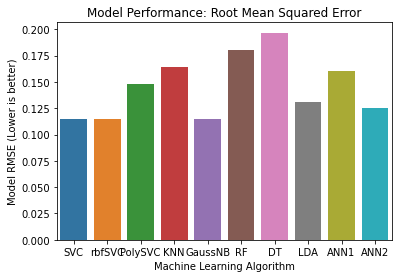

In [43]:
ax1 = sns.barplot(x=names, y=RMSEresults);
ax1.set(xlabel="Machine Learning Algorithm",
        ylabel="Model RMSE (Lower is better)",
        title="Model Performance: Root Mean Squared Error");

## Cross Validation

This section borrows the methodology from [Jason Brownlee at machinelearningmastery.com](https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/).

In [27]:
# import warnings
# #warnings.filterwarnings('ignore')
# 
# # Number of tests to make.
# N=50;
# 
# from sklearn import model_selection
# results = [];
# names = [];
# scoring = 'accuracy';
# 
# with warnings.catch_warnings():      #Catch warnings in code section
#     #warnings.simplefilter("ignore")           # Suppress Warnings for LR [FIXED].
#     for model in models:
#         kfold = model_selection.KFold(n_splits=N);
#         cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring);
#         results.append(cv_results);
#     
# #pd.DataFrame(results)

In [ ]:
# names = np.array(['SVC','rbfSVC','PolySVC','KNN','GaussNB','RF','DT', 'LDA']);
# 
# temp1=pd.DataFrame(results).T;
# temp1.columns = names;
# 
# ax2 = sns.boxplot(data=temp1, palette='Spectral')
# ax2.set(xlabel = "ML Algorithm",
#        ylabel = 'Accuracy',
#        title = f"ML Algorithm Accuracy Comparison over {N} tests");
# sns.despine(ax=ax2,offset=5, trim=True)
# 
# #pd.DataFrame(names).T

## Confusion Matrices

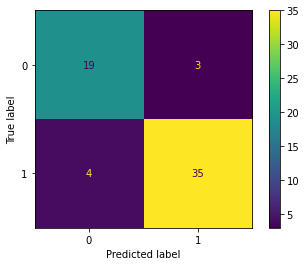

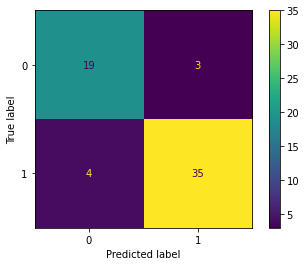

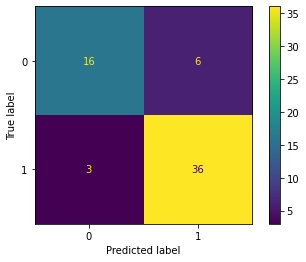

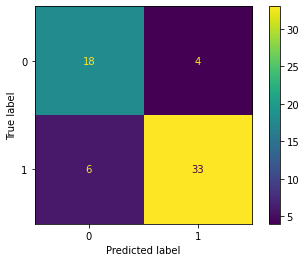

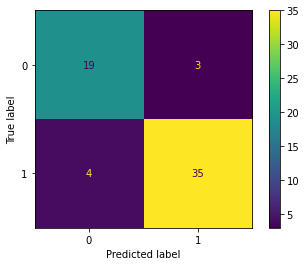

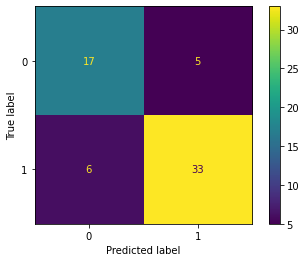

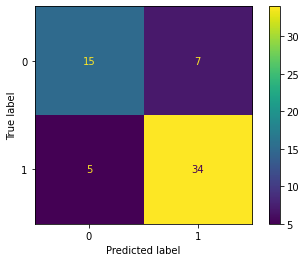

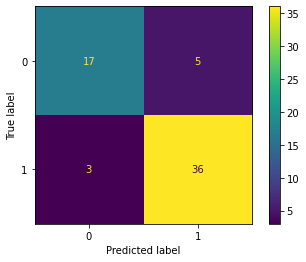

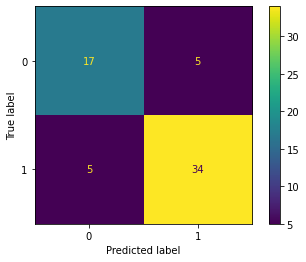

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

matrices = [];
for model in models:
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test,model.predict(x_test)>0.5))
    #disp.ax_.set_title(f"Conusion Matrix:")
    matrices.append(disp)
num=0;
for m in matrices:
    m.plot()
    #print(names[num])
    num=num+1

# Model Optimization

## Naive Bayes Optimization
This section borrows the methodology from [this tutorial.](https://scikit-optimize.github.io/stable/auto_examples/sklearn-gridsearchcv-replacement.html)

**BUG**: Must downgrade sklearn to version 0.23.2 for below code to work due to [this bug.](https://github.com/scikit-optimize/scikit-optimize/issues/978)

In [ ]:
# # Must downgrade SKlearn to v=0.23.2 for this code to work.
# 
# from skopt import BayesSearchCV
# opt = BayesSearchCV(
#     SVC(),
#     {
#         'C': (1e-6, 1e+6, 'log-uniform'),
#         'gamma': (1e-6, 1e+1, 'log-uniform'),
#         'degree': (1, 8),  # integer valued parameter
#         'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
#     },
#     n_iter=15,
#     cv=3
# );
# 
# # callback handler
# def on_step(optim_result):
#     score = opt.best_score_;
#     print("best score: %s" % score)
#     if score >= 0.81:
#         print('Interrupting!')
#         return True
# 
# opt.fit(x_train, y_train, callback=on_step);

The optimized score, test score, and parameters are:

In [ ]:
# print("val. score: %s" % opt.best_score_)
# print("test score: %s" % opt.score(x_test, y_test))
# print("best params: %s" % str(opt.best_params_))

In [ ]:
# old_score = np.mean(pd.DataFrame(results).iloc[4,:]);
# print(f'The optimized vs unoptimized improvement is: {(opt.score(x_test, y_test)-old_score)*100/old_score} %')

# Conclusions

Analysing model performance from RMSE values as well as the cross validation performed in sections 5.1 and 5.2 shows that the **Linear Discriminant Analysis** (LDA) is the best classifier of all those tested for this dataset.

The RMSE for the dataset is constantly among the lowest 3 of all models (with some run to run variation depending on test/train data split). The figure on section 5.2 clearly shows that **50% of the LDA models perform better than 75% of all other models**. Similarly, 75% of the LDA models perform better than 50% of all other models, except for Gaussian Naive-Bayes and Decision Tree models.

Optimization of the SVC classifier using the **skopt** module showed that the optimal parameters for the Support Vector (Machine) Classifier are:
> C = 7879.649123415433
>
> degree = 1
>
> gamma = 0.0035637719586721498
>
> kernel = 'linear'

Performance of the optimized NB was around **1.79 Percent Better** than the unoptimized model.


Overall, the recomended classifier based on the above analysis is: **Linear Discriminant Analysis**.